# Classifying Vietnamese Ethnic Groups using ResNet50 

## Abstract

Using ResNet-50, which is a convolutional neural network that is 50 layers deep, one could distinguish 54 different ethnic groups of Vietnamese people that is 18 times more accurate than human guesses.

There's a strong correlation between population ranking of the group and how easy to distinguish that group is. Also there's a correlation between how spare the population is, its geographic proximity, and its terrain elevation that leads to problems that confused the model.

## Table of content

1. Goal
2. Background
3. Data Work
    a. Data Acquisition
    b. Environment Setup
    c. Data Upload
    d. View Data
4. Train model (1st stage)
5. Interpretation (1st stage)
6. Data Cleaning
7. Train model (2nd and 3rd stages)
8. Interpretation (3rd stages)
9. Analysis

## Goal

To classify Vietnamese Ethnic Groups using photos of them found online through a convolutional neural network, in this case ResNet34, to predict which person belongs to what group. 

## Background

Within Vietnam, there are eight ethnic groups:

1. Austroasiatic, Vietic (Việt - Mường (ngữ hệ Nam Á)):
    - Việt (Kinh) - **The majority accounting for 3/4th of the population.** 73.594.427	people. 
    - Mường - 1.268.963	people. **4th most.**
    - Chứt 
    - Thổ 
    
    
2. Austroasiatic other than Vietic (Môn – Khmer):
    - Khmer (Khơ Me) - 1.260.640 people. **5th most.**
    - Ba Na
    - Brâu
    - Bru-Vân Kiều
    - Co
    - Cơ Tu
    - Giẻ Triêng
    - Hrê
    - Kháng
    - Khơ Mú
    - Mảng
    - M'Nông
    - Xtiêng
    - Cờ Ho
    - Mạ
    - Chơ Ro
    - Ơ Đu
    - Rơ Măm
    - Tà Ôi
    - Xinh Mun
    - Xơ Đăng
    
    
3. Tai – Kadai (Tày - Thái):
    - Tày - 1.626.392 people. **2nd most populous.**
    - Thái (Táy) - 1.550.423 people. **3rd most populous.**
        - Subgroups: Thái Trắng, Thái Đen, Thái Đỏ
    - Nùng - 968.800 people. **7th most.**	
    - Bố Y
    - Giáy
    - Lào
    - Lự
    - Sán Chay	
    
    
4. Kadai (Kra):
    - Cờ Lao
    - La Chí
    - La Ha	
    - Pu Péo
    
    
5. Hmong – Mien (H'Mông - Dao):
    - H'Mông (a.k.a Hmong, Mông, Mèo, Mẹo, Mán, Miêu Tộc) - 1.068.189 people. **6th most.**
    - Dao (a.k.a Yao, Mán, Động, Trại, Dìu, Miến, Kiêm, Kìm Mùn) - 751.067	people. **9th most.**
    - Pà Thẻn
    
    
6. Malayo - Polynesian (Nam đảo):
    - Gia Rai (Jarai, Chơ Rai) - 411.275 people. **10th most.**
    - Chăm
    - Chu Ru
    - Ê Đê	
    - Ra Glai
    
    
7. Chinese (Hán (Sinitic)):
    - Hoa (a.k.a Overseas Chinese, Tiều, Hán) - 823.071	people. **8th most.**
    - Ngái
    - Sán Dìu
    
    
8. Tibeto-Burman (Tạng-Miến):
    - Cống
    - Hà Nhì
    - La Hủ
    - Lô Lô
    - Phù Lá
    - Si La
    
There are ethnics groups that are not included in the official list and groups that are being debated.

For more infortmation, click here: [List of ethnic groups in Vietnam
](https://en.wikipedia.org/wiki/List_of_ethnic_groups_in_Vietnam) and [Các dân tộc tại Việt Nam
](https://vi.wikipedia.org/wiki/C%C3%A1c_d%C3%A2n_t%E1%BB%99c_t%E1%BA%A1i_Vi%E1%BB%87t_Nam)

### So why classifying subgroups?

The reason is that Vietnamese don't really consider groups to be groups, but subgroups to be groups. Vietnam has 54 groups a.k.a 54 dân tộc. So this project classifies 54 subgroups from now (from now on, subgroups will refer to as groups, and the original groups would be called big groups).

Plus, it's more fun. Eight-group classification problem is not as fun as fifty-four-group one.

## Data Work

### Data Acquisition

To find the images of the group, let us use Google Image Search. 

Neat tips to automate the data acquisition process: 
- The more specific you are, the better. Use "" for specific keywords, and - to exclude unwanted similar results

`"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis`

- Run some Js scripts to batch download urls of the found images.
    - In Google Chrome press Ctrl+Shift+j on Windows/Linux and Cmd+Opt+j on macOS, and a small window the javascript 'Console' will appear. In Firefox press Ctrl+Shift+k on Windows/Linux or Cmd+Opt+k on macOS. That is where you will paste the JavaScript commands.
    - You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

> urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
> window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));




### Environment Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

(fastai is based on pytorch)

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [3]:
bs = 64 # batch size
# bs = 16 # uncomment if GPU cannot handle batch size of 64

### Data Upload

#### Create directory and upload urls file into your server

Create folder and file names

In [4]:
'''
To automate the naming process, go to: http://www.mynikko.com/tools/tool_incrementstr.html
And have the template:
folder_[x] = ""
file_[x] = ".csv"
''' 

folder_0 = "bana" # Ba Na
file_0 = "bana.csv"
folder_1 = "boy" # Bố Y
file_1 = "boy.csv"
folder_2 = "brau" # Brâu
file_2 = "brau.csv"
folder_3 = "bru" # Bru
file_3 = "bru.csv"
folder_4 = "cham" # Chăm
file_4 = "cham.csv"
folder_5 = "choro" # Chơ Ro
file_5 = "choro.csv"
folder_6 = "churu" # Chu Ru
file_6 = "churu.csv"
folder_7 = "chut" # Chứt
file_7 = "chut.csv"
folder_8 = "co" # Co
file_8 = "co.csv"
folder_9 = "coho" # Cơ ho
file_9 = "coho.csv"
folder_10 = "colao" # Cơ Lao
file_10 = "colao.csv"
folder_11 = "cong" # Cống
file_11 = "cong.csv"
folder_12 = "cotu" # Cơ Tu
file_12 = "cotu.csv"
folder_13 = "dao" # Dao 
file_13 = "dao.csv"
folder_14 = "ede" # Ê Đê
file_14 = "ede.csv"
folder_15 = "giarai" # Gia Rai
file_15 = "giarai.csv"
folder_16 = "giay" # Giáy
file_16 = "giay.csv"
folder_17 = "gietrieng" # Gié Triêng
file_17 = "gietrieng.csv"
folder_18 = "hanhi" # Hà Nhì
file_18 = "hanhi.csv"
folder_19 = "hmong" #H'mong
file_19 = "hmong.csv"
folder_20 = "hoa" # Hoa
file_20 = "hoa.csv"
folder_21 = "hre" # H'rê
file_21 = "hre.csv"
folder_22 = "khang" # Kháng
file_22 = "khang.csv"
folder_23 = "khmer" # Khmer
file_23 = "khmer.csv"
folder_24 = "khomu" # Khơ Mú
file_24 = "khomu.csv"
folder_25 = "kinh" # Kinh
file_25 = "kinh.csv"
folder_26 = "lachi" # La Chí
file_26 = "lachi.csv"
folder_27 = "laha" # La Ha
file_27 = "laha.csv"
folder_28 = "lahu" # La Hú
file_28 = "lahu.csv"
folder_29 = "lao" # Lao
file_29 = "lao.csv"
folder_30 = "lolo" # Lô Lô
file_30 = "lolo.csv"
folder_31 = "lu" # Lự
file_31 = "lu.csv"
folder_32 = "ma" # Mả
file_32 = "ma.csv"
folder_33 = "mang" # Máng
file_33 = "mang.csv"
folder_34 = "mnong" #M'nông
file_34 = "mnong.csv"
folder_35 = "muong" # Mường
file_35 = "muong.csv"
folder_36 = "ngai" # Ngái
file_36 = "ngai.csv"
folder_37 = "nung" # Nùng
file_37 = "nung.csv"
folder_38 = "odu" # Ơ Đu
file_38 = "odu.csv"
folder_39 = "pathen" # Pà Thẻn
file_39 = "pathen.csv"
folder_40 = "phula" # Phù Lá
file_40 = "phula.csv"
folder_41 = "pupeo" # Pu Péo
file_41 = "pupeo.csv"
folder_42 = "raglai" # Ra Glai
file_42 = "raglai.csv"
folder_43 = "romam" # Rơ Măm
file_43 = "romam.csv"
folder_44 = "sanchay" # Sán Chay
file_44 = "sanchay.csv"
folder_45 = "sandiu" # Sán Diu
file_45 = "sandiu.csv"
folder_46 = "sila" # Si La
file_46 = "sila.csv"
folder_47 = "taoi" # Tà Ôi
file_47 = "taoi.csv"
folder_48 = "tay" # Tày
file_48 = "tay.csv"
folder_49 = "thai" # Thái
file_49 = "thai.csv"
folder_50 = "tho" # Thổ
file_50 = "tho.csv"
folder_51 = "xinhmun" # Xinh Mun
file_51 = "xinhmun.csv"
folder_52 = "xodang" # Xơ Đăng
file_52 = "xodang.csv"
folder_53 = "xtieng" # X'tiêng
file_53 = "xtieng.csv"

Create paths and destinations to join the path and the folder

In [5]:
'''
dest_[x] = path/folder_[x]
dest_[x].mkdir(parents=True, exist_ok=True)
'''

path = Path('data/vegc') # VEGC: Vietnamese Ethnic Group Classifier

dest_0 = path/folder_0
dest_0.mkdir(parents=True, exist_ok=True)
dest_1 = path/folder_1
dest_1.mkdir(parents=True, exist_ok=True)
dest_2 = path/folder_2
dest_2.mkdir(parents=True, exist_ok=True)
dest_3 = path/folder_3
dest_3.mkdir(parents=True, exist_ok=True)
dest_4 = path/folder_4
dest_4.mkdir(parents=True, exist_ok=True)
dest_5 = path/folder_5
dest_5.mkdir(parents=True, exist_ok=True)
dest_6 = path/folder_6
dest_6.mkdir(parents=True, exist_ok=True)
dest_7 = path/folder_7
dest_7.mkdir(parents=True, exist_ok=True)
dest_8 = path/folder_8
dest_8.mkdir(parents=True, exist_ok=True)
dest_9 = path/folder_9
dest_9.mkdir(parents=True, exist_ok=True)
dest_10 = path/folder_10
dest_10.mkdir(parents=True, exist_ok=True)
dest_11 = path/folder_11
dest_11.mkdir(parents=True, exist_ok=True)
dest_12 = path/folder_12
dest_12.mkdir(parents=True, exist_ok=True)
dest_13 = path/folder_13
dest_13.mkdir(parents=True, exist_ok=True)
dest_14 = path/folder_14
dest_14.mkdir(parents=True, exist_ok=True)
dest_15 = path/folder_15
dest_15.mkdir(parents=True, exist_ok=True)
dest_16 = path/folder_16
dest_16.mkdir(parents=True, exist_ok=True)
dest_17 = path/folder_17
dest_17.mkdir(parents=True, exist_ok=True)
dest_18 = path/folder_18
dest_18.mkdir(parents=True, exist_ok=True)
dest_19 = path/folder_19
dest_19.mkdir(parents=True, exist_ok=True)
dest_20 = path/folder_20
dest_20.mkdir(parents=True, exist_ok=True)
dest_21 = path/folder_21
dest_21.mkdir(parents=True, exist_ok=True)
dest_22 = path/folder_22
dest_22.mkdir(parents=True, exist_ok=True)
dest_23 = path/folder_23
dest_23.mkdir(parents=True, exist_ok=True)
dest_24 = path/folder_24
dest_24.mkdir(parents=True, exist_ok=True)
dest_25 = path/folder_25
dest_25.mkdir(parents=True, exist_ok=True)
dest_26 = path/folder_26
dest_26.mkdir(parents=True, exist_ok=True)
dest_27 = path/folder_27
dest_27.mkdir(parents=True, exist_ok=True)
dest_28 = path/folder_28
dest_28.mkdir(parents=True, exist_ok=True)
dest_29 = path/folder_29
dest_29.mkdir(parents=True, exist_ok=True)
dest_30 = path/folder_30
dest_30.mkdir(parents=True, exist_ok=True)
dest_31 = path/folder_31
dest_31.mkdir(parents=True, exist_ok=True)
dest_32 = path/folder_32
dest_32.mkdir(parents=True, exist_ok=True)
dest_33 = path/folder_33
dest_33.mkdir(parents=True, exist_ok=True)
dest_34 = path/folder_34
dest_34.mkdir(parents=True, exist_ok=True)
dest_35 = path/folder_35
dest_35.mkdir(parents=True, exist_ok=True)
dest_36 = path/folder_36
dest_36.mkdir(parents=True, exist_ok=True)
dest_37 = path/folder_37
dest_37.mkdir(parents=True, exist_ok=True)
dest_38 = path/folder_38
dest_38.mkdir(parents=True, exist_ok=True)
dest_39 = path/folder_39
dest_39.mkdir(parents=True, exist_ok=True)
dest_40 = path/folder_40
dest_40.mkdir(parents=True, exist_ok=True)
dest_41 = path/folder_41
dest_41.mkdir(parents=True, exist_ok=True)
dest_42 = path/folder_42
dest_42.mkdir(parents=True, exist_ok=True)
dest_43 = path/folder_43
dest_43.mkdir(parents=True, exist_ok=True)
dest_44 = path/folder_44
dest_44.mkdir(parents=True, exist_ok=True)
dest_45 = path/folder_45
dest_45.mkdir(parents=True, exist_ok=True)
dest_46 = path/folder_46
dest_46.mkdir(parents=True, exist_ok=True)
dest_47 = path/folder_47
dest_47.mkdir(parents=True, exist_ok=True)
dest_48 = path/folder_48
dest_48.mkdir(parents=True, exist_ok=True)
dest_49 = path/folder_49
dest_49.mkdir(parents=True, exist_ok=True)
dest_50 = path/folder_50
dest_50.mkdir(parents=True, exist_ok=True)
dest_51 = path/folder_51
dest_51.mkdir(parents=True, exist_ok=True)
dest_52 = path/folder_52
dest_52.mkdir(parents=True, exist_ok=True)
dest_53 = path/folder_53
dest_53.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('data/vegc/bana'),
 PosixPath('data/vegc/boy'),
 PosixPath('data/vegc/brau'),
 PosixPath('data/vegc/bru'),
 PosixPath('data/vegc/cham'),
 PosixPath('data/vegc/choro'),
 PosixPath('data/vegc/churu'),
 PosixPath('data/vegc/chut'),
 PosixPath('data/vegc/co'),
 PosixPath('data/vegc/coho'),
 PosixPath('data/vegc/colao'),
 PosixPath('data/vegc/cong'),
 PosixPath('data/vegc/cotu'),
 PosixPath('data/vegc/dao'),
 PosixPath('data/vegc/ede'),
 PosixPath('data/vegc/giarai'),
 PosixPath('data/vegc/giay'),
 PosixPath('data/vegc/gietrieng'),
 PosixPath('data/vegc/hanhi'),
 PosixPath('data/vegc/hmong'),
 PosixPath('data/vegc/hoa'),
 PosixPath('data/vegc/hre'),
 PosixPath('data/vegc/khang'),
 PosixPath('data/vegc/khmer'),
 PosixPath('data/vegc/khomu'),
 PosixPath('data/vegc/kinh'),
 PosixPath('data/vegc/lachi'),
 PosixPath('data/vegc/laha'),
 PosixPath('data/vegc/lahu'),
 PosixPath('data/vegc/lao'),
 PosixPath('data/vegc/lolo'),
 PosixPath('data/vegc/lu'),
 PosixPath('data/vegc/ma'),
 PosixP

#### Download files

In [7]:
classes = ['bana','boy','brau','cham','choro','churu','chut','co','coho','colao','cong','cotu',
           'dao','ede','giarai','giay','gietrieng','hanhi','hmong','hoa','hre','khang','khmer',
           'khomu','kinh','lachi','laha','lahu','lao','lolo','lu','ma','mang','mnong','muong',
           'ngai','nung','odu','pathen','phula','pupeo','raglai','romam','sanchay','sandiu',
           'sila','taoi','tay','thai','tho','xinhmun','xodang','xtieng']

# 54 classes in total.

In [8]:
# download_images(path_[x]/file_[x], dest_[x], max_pics=200)

download_images(path/file_0, dest_0, max_pics=200);
download_images(path/file_1, dest_1, max_pics=200);
download_images(path/file_2, dest_2, max_pics=200);
download_images(path/file_3, dest_3, max_pics=200);
download_images(path/file_4, dest_4, max_pics=200);
download_images(path/file_5, dest_5, max_pics=200);
download_images(path/file_6, dest_6, max_pics=200);
download_images(path/file_7, dest_7, max_pics=200);
download_images(path/file_8, dest_8, max_pics=200);
download_images(path/file_9, dest_9, max_pics=200);
download_images(path/file_10, dest_10, max_pics=200);
download_images(path/file_11, dest_11, max_pics=200);
download_images(path/file_12, dest_12, max_pics=200);
download_images(path/file_13, dest_13, max_pics=200);
download_images(path/file_14, dest_14, max_pics=200);
download_images(path/file_15, dest_15, max_pics=200);
download_images(path/file_16, dest_16, max_pics=200);
download_images(path/file_17, dest_17, max_pics=200);
download_images(path/file_18, dest_18, max_pics=200);
download_images(path/file_19, dest_19, max_pics=200);
download_images(path/file_20, dest_20, max_pics=200);
download_images(path/file_21, dest_21, max_pics=200);
download_images(path/file_22, dest_22, max_pics=200);
download_images(path/file_23, dest_23, max_pics=200);
download_images(path/file_24, dest_24, max_pics=200);
download_images(path/file_25, dest_25, max_pics=200);
download_images(path/file_26, dest_26, max_pics=200);
download_images(path/file_27, dest_27, max_pics=200);
download_images(path/file_28, dest_28, max_pics=200);
download_images(path/file_29, dest_29, max_pics=200);
download_images(path/file_30, dest_30, max_pics=200);
download_images(path/file_31, dest_31, max_pics=200);
download_images(path/file_32, dest_32, max_pics=200);
download_images(path/file_33, dest_33, max_pics=200);
download_images(path/file_34, dest_34, max_pics=200);
download_images(path/file_35, dest_35, max_pics=200);
download_images(path/file_36, dest_36, max_pics=200);
download_images(path/file_37, dest_37, max_pics=200);
download_images(path/file_38, dest_38, max_pics=200);
download_images(path/file_39, dest_39, max_pics=200);
download_images(path/file_40, dest_40, max_pics=200);
download_images(path/file_41, dest_41, max_pics=200);
download_images(path/file_42, dest_42, max_pics=200);
download_images(path/file_43, dest_43, max_pics=200);
download_images(path/file_44, dest_44, max_pics=200);
download_images(path/file_45, dest_45, max_pics=200);
download_images(path/file_46, dest_46, max_pics=200);
download_images(path/file_47, dest_47, max_pics=200);
download_images(path/file_48, dest_48, max_pics=200);
download_images(path/file_49, dest_49, max_pics=200);
download_images(path/file_50, dest_50, max_pics=200);
download_images(path/file_51, dest_51, max_pics=200);
download_images(path/file_52, dest_52, max_pics=200);
download_images(path/file_53, dest_53, max_pics=200);

In [9]:
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

Remove any images that cannot be opened:

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bana


boy


brau


cham


choro


churu


chut


co


coho


colao


cong


cotu


dao


ede


giarai


giay


gietrieng


hanhi


hmong


hoa


hre


khang


khmer


khomu


kinh


lachi


laha


lahu


lao


lolo


lu


ma


mang


mnong


muong


ngai


nung


odu


pathen


phula


pupeo


raglai


romam


sanchay


sandiu


sila


taoi


tay


thai


tho


xinhmun


xodang


xtieng


### View Data

In [11]:
'''
Using numpy, randomize the choices (hence the seed for non-number random choices)
ImageDataBunch is used for computer vision classification.
From folder, normalize data, then turn the photos into an ImageDataBunch as data.
'''

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [12]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [18]:
'''
data.classes: Show the classes of the data
data.c: Show the number of classes
len(data.train_ds): Show the number of photos that will be used to train the model
len(data.valid_ds): Show the number of photos that will be used to validate the model
'''
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bana',
  'boy',
  'brau',
  'bru',
  'cham',
  'choro',
  'churu',
  'chut',
  'co',
  'coho',
  'colao',
  'cong',
  'cotu',
  'dao',
  'ede',
  'giarai',
  'giay',
  'gietrieng',
  'hanhi',
  'hmong',
  'hoa',
  'hre',
  'khang',
  'khmer',
  'khomu',
  'kinh',
  'lachi',
  'laha',
  'lahu',
  'lao',
  'lolo',
  'lu',
  'ma',
  'mang',
  'mnong',
  'muong',
  'ngai',
  'nung',
  'odu',
  'pathen',
  'phula',
  'pupeo',
  'raglai',
  'romam',
  'sanchay',
  'sandiu',
  'sila',
  'taoi',
  'tay',
  'thai',
  'tho',
  'xinhmun',
  'xodang',
  'xtieng'],
 54,
 6260,
 1565)

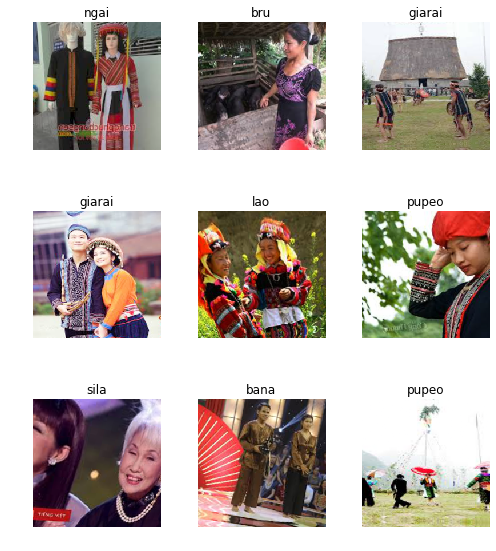

In [20]:
data.show_batch(rows=3, figsize=(7,8))

## Train Model (1st Stage)

In [21]:
'''
The learning model uses a convolutional neural network (cnn_learner) that takes the data in, uses resnet50, 
with the output metrics as error rates.
'''

learn = cnn_learner(data, models.resnet50, metrics=accuracy)

'\nThe learning model uses a convolutional neural network (cnn_learner) that takes the data in, uses resnet50, \nwith the output metrics as error rates.\n'

In [22]:
'''
Inside resnet50:
''' 
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [23]:
# 4 epochs 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,4.967885,3.802337,0.162939,00:42
1,4.175502,3.669395,0.170607,00:38
2,3.639973,3.446442,0.177636,00:38
3,3.265425,3.358774,0.203834,00:38
4,2.963913,3.275916,0.214058,00:39
5,2.708270,3.237226,0.220447,00:39
6,2.469281,3.224287,0.228754,00:38
7,2.283163,3.223806,0.234505,00:38


In [24]:
learn.save('stage-1')
# Save the weights of the network for future reuse

In [25]:
learn.unfreeze()
# Unfreeze the layers to test

In [26]:
learn.lr_find()
# Find the learning rate

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


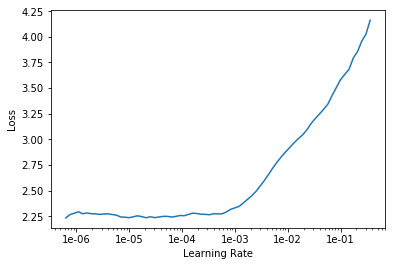

In [27]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

Before cleaning the data and/or training any further, let's look at the results and find out what's causing the problems.

## Interpretation (1st stage)

In [29]:
interp = ClassificationInterpretation.from_learner(learn) # Use the interpretation tool to understand the model
losses, idxs = interp.top_losses() # See what are the top mistakes
len(data.valid_ds)==len(losses)==len(idxs) # Set the losses and the indexes to be equal to the number of validation items

True

We could plot the top mistakes between the groups using plot_top_losses

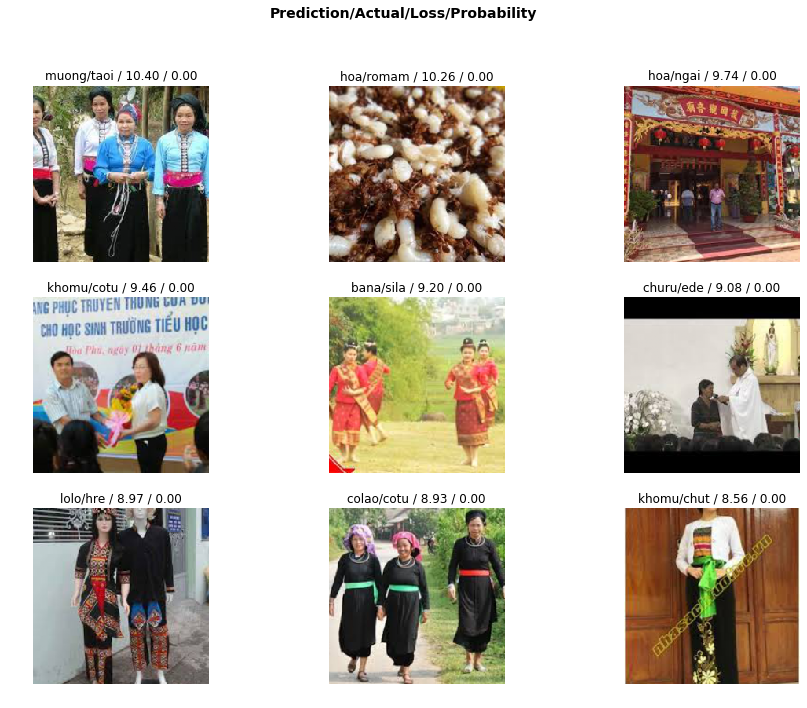

In [31]:
# Plot the top losses to see what's wrong
interp.plot_top_losses(9, figsize=(15,11))

From the plot, we could see that it's very challenging to distinguish between Mường and Tà Ôi people for example, with zero accuracy, and with losses up to 10.4. The model predicted that the validation photo is Mường, but it turns out to be Tà Ôi.

Another tool that we could use is the confusion matrix.

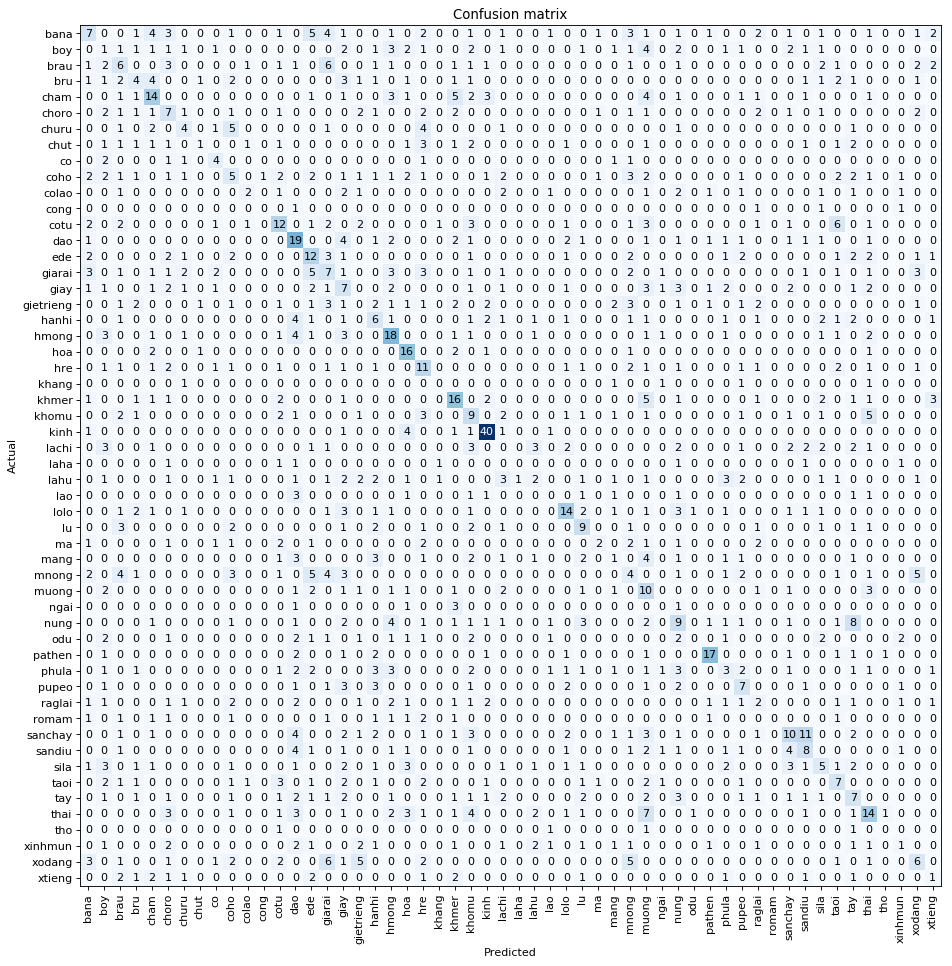

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=80)

One very interesting thing that showed is that the more populous a group is, the easier it is to accurately predict it. This would be discussed in the discussion section. 

Let's use another tool to see which groups are most confused with each other. 

In [34]:
interp.most_confused(min_val=5)

[('sanchay', 'sandiu', 11),
 ('nung', 'tay', 8),
 ('thai', 'muong', 7),
 ('brau', 'giarai', 6),
 ('cotu', 'taoi', 6),
 ('xodang', 'giarai', 6),
 ('bana', 'ede', 5),
 ('cham', 'khmer', 5),
 ('churu', 'coho', 5),
 ('giarai', 'ede', 5),
 ('khmer', 'muong', 5),
 ('khomu', 'thai', 5),
 ('mnong', 'ede', 5),
 ('mnong', 'xodang', 5),
 ('xodang', 'gietrieng', 5),
 ('xodang', 'mnong', 5)]

Let's clean the data to improve the results. Some of the top losses are not due to bad performance by the model. It comes from the data itself, with photos in the data that should not be there. 

## Data Cleaning

In [35]:
from fastai.widgets import *

Using ImageCleaner from fastai.widgets, we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. We can do this with .from_toplosses. We then feed the top losses indexes and corresponding dataset to ImageCleaner.

Notice that the widget will not delete images directly from disk but it will create a new csv file cleaned.csv from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. 

In [36]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

Create a new learner to use our new databunch with all the images

In [38]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('stage-1');

In [39]:
# Let's format the data using toplosses results
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [41]:
# Let's clean the data
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Once we cleared the top losses, let's delete similar photos.

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [44]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Now that we finish cleaning the data from irrelevant photos and similar photos, let's save the new databunch using the cleaned.csv.

In [45]:
db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_none()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

## Train Model (2nd and 3rd Stages)

In [46]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

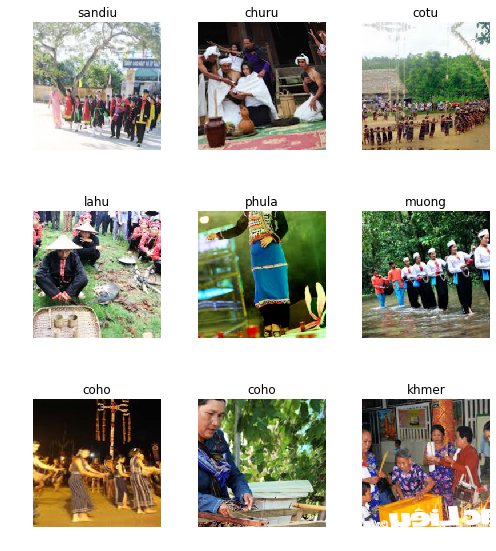

In [48]:
data.show_batch(rows=3, figsize=(7,8))

In [49]:
data.c, len(data.train_ds), len(data.valid_ds)

(54, 6055, 1513)

Comparing to the old (54, 6260, 1565) tuple, we can see that the number of "bad" data has been pruned.

In [50]:
learn_2 = cnn_learner(data, models.resnet50, metrics=accuracy)

In [51]:
learn_2.load('stage-1');

In [52]:
learn_2.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.680325,2.462871,0.364838,00:38
1,2.851099,2.735183,0.307336,00:37
2,2.570598,2.714813,0.318572,00:37
3,2.244215,2.695438,0.317911,00:38


### What if I don't load stage-1 weight?

We could test what happens if you don't load stage-1 weights to train the model. Let's create another cnn with the new databunch but starts from scratch.

In [53]:
learn_3 = cnn_learner(data, models.resnet50, metrics=accuracy)

In [54]:
learn_3.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,4.722599,3.886803,0.162591,00:37
1,3.875693,3.502468,0.187707,00:37
2,3.284454,3.309058,0.220753,00:37
3,2.818805,3.293896,0.216788,00:38


It ended up starting from the beginning. By the 4th epoch, the accuracy was about the same as the 4th epoch of stage-1. Let's move forward with learner_2.

In [55]:
learn_2.save('stage-2')

In [57]:
learn_2.unfreeze()

In [58]:
learn_2.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


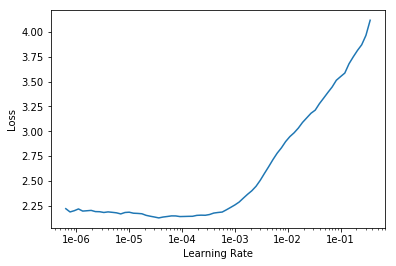

In [60]:
learn_2.recorder.plot()

Let's fine-tune the learning rate to maximize the accuracy.

In [62]:
learn_2.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.123250,2.699475,0.315268,00:53
1,2.079848,2.698345,0.325843,00:52
2,1.910830,2.695765,0.334435,00:52
3,1.803882,2.701184,0.329147,00:51


We could see that the accuracy tops at 33.44%. Anymore training will lead to overfitting. Let's analyze the results and draw the conclusions.

In [63]:
learn_2.save('stage-3')

## Interpretation (3rd stage)

In [65]:
interp1 = ClassificationInterpretation.from_learner(learn_2)
losses, idxs = interp1.top_losses()
len(data.valid_ds)==len(losses)==len(idxs) 

True

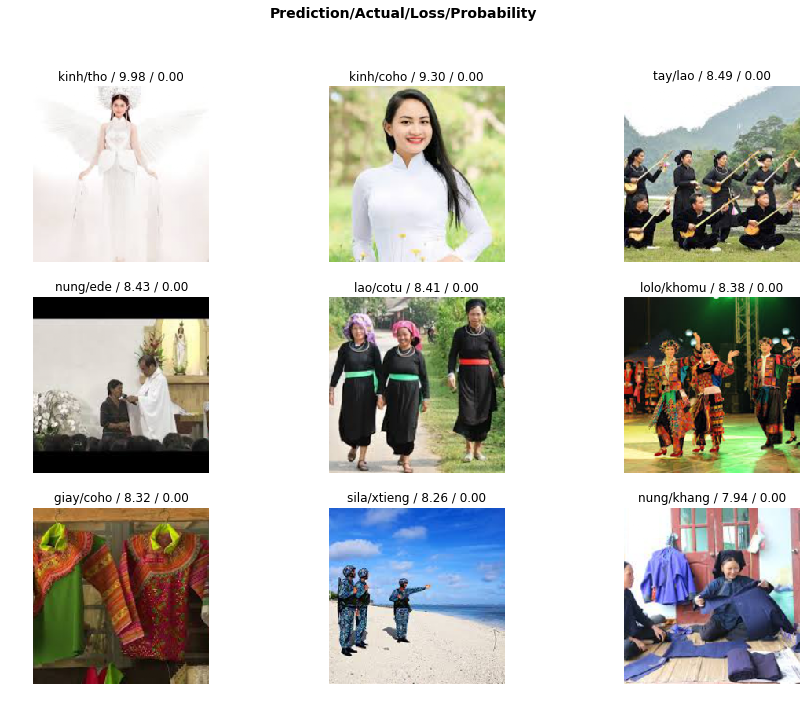

In [66]:
interp1.plot_top_losses(9, figsize=(15,11))

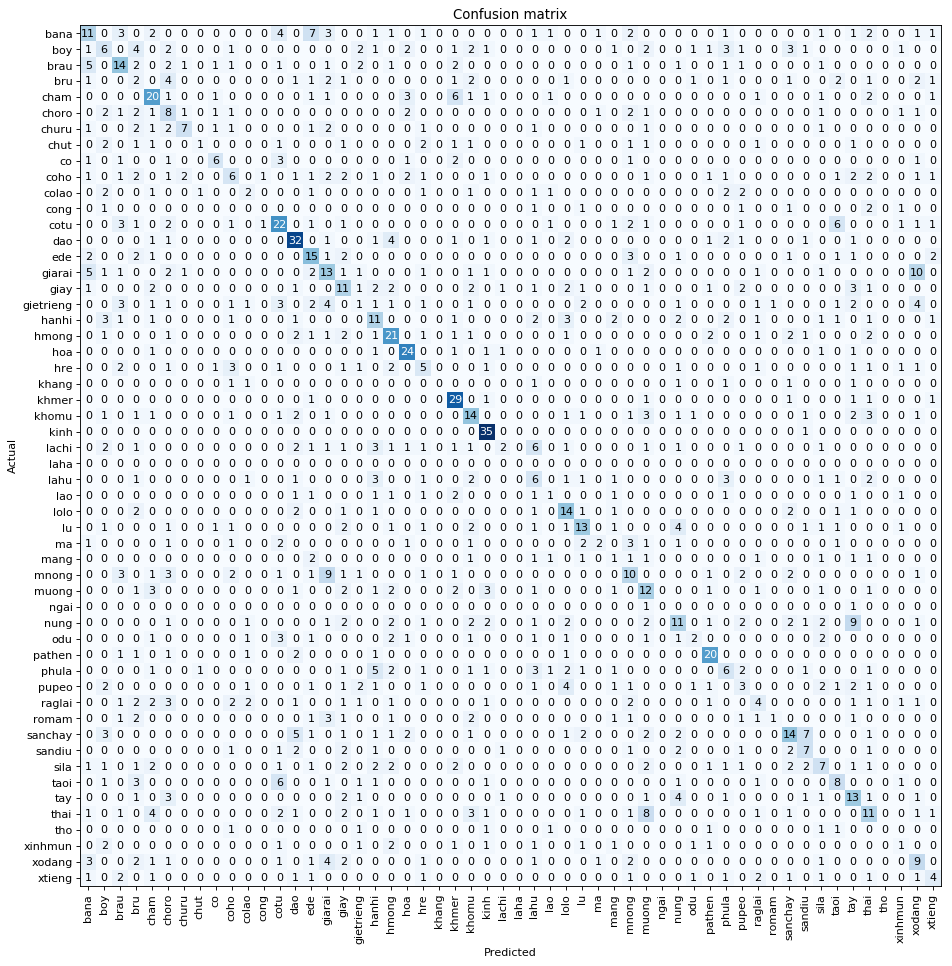

In [67]:
interp1.plot_confusion_matrix(figsize=(12,12), dpi=80)

In [68]:
interp1.most_confused(min_val=5)

[('giarai', 'xodang', 10),
 ('mnong', 'giarai', 9),
 ('nung', 'tay', 9),
 ('thai', 'muong', 8),
 ('bana', 'ede', 7),
 ('sanchay', 'sandiu', 7),
 ('cham', 'khmer', 6),
 ('cotu', 'taoi', 6),
 ('lachi', 'lahu', 6),
 ('taoi', 'cotu', 6),
 ('brau', 'bana', 5),
 ('giarai', 'bana', 5),
 ('phula', 'hanhi', 5),
 ('sanchay', 'dao', 5)]

Went from 16 groups to 14 groups.

In [70]:
learn_2.export()

## Analysis

### Accuracy 

The highest accuracy of the model is 33.44%. But what does it really mean?

Assuming a person with no understanding of Vietnamese Ethnic Groups, if the person is to randomly guess, he would have a (1/54) or 1.85% chance of being accurate. 

So the model would be **18 times** more accurate than him. 

Also, the model has a **1 in 3 chances** of guessing a **random** group right given a **random Vietnamese person photo** as a validation input.

### Most accurate groups

Like previously discussed, there seems to be a correlation between group population and model prediction accuracy.


If we list the most accurate group prediction (with numbers) and the population ranking, we have:
1. (35) Kinh - 1st
2. (32) Dao - 9th
3. (29) Khmer - 5th 
4. (24) Hoa - 8th
5. (22) Cơ Tu - 25th
6. (21) H'mong - 6th
7. (20) Chăm - 16th
8. (20) Pà Thẻn - 41st
9. (15) Ê Đê - 11th

(There are a couple of 10th places so we'll stop at 9). 

Five of the top 9 are in top 10 most populous. One borders at ranked 11, but we could safely say that 2/3 of the rankings belongs to the top 10 most populous.

But what happens to Pà Thẻn? With a population of merely 6,811 people, how could they be so identifiable? The reason lies in their garment. A quick [Google Search](https://www.google.com/search?q=p%C3%A0+th%E1%BA%BBn&sxsrf=ALeKk02TVKWri5KJ9Tbs2U-zhPvuQ56hiQ:1593369801152&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjj-PiHlaXqAhUXHM0KHXF7CTcQ_AUoAXoECAsQAw&biw=1536&bih=720) would overwhelms you with their unique and beautiful bright red ethnic garments. This would strongly outweighs the resnet weights and make them very easy to distinguish. 

### Least accurate groups

Let's take a look the most confused groups:

- ('giarai', 'xodang', 10)
- ('mnong', 'giarai', 9)
- ('nung', 'tay', 9)
- ('thai', 'muong', 8)
- ('bana', 'ede', 7)
- ('sanchay', 'sandiu', 7)
- ('cham', 'khmer', 6)
- ('cotu', 'taoi', 6)
- ('lachi', 'lahu', 6)
- ('taoi', 'cotu', 6)
- ('brau', 'bana', 5)
- ('giarai', 'bana', 5)
- ('phula', 'hanhi', 5)
- ('sanchay', 'dao', 5)
 
Gia Rai, Xơ Đăng, M'nong, Ba Na, Ê Đê, Cơ Ty, Tà Ôi, Brâu all live in Kon Tum, Dak Lak, and Phu Yen (Tây Nguyên region). These groups live in the mountainous sides of Vietnam, wearing similar type of clothings, have similar architectures and cultures, which makes it challenging to distinguish them unless you are from these regions.

Nùng, Tày, Sán Chay, Sán Diu, Dao have very similar problems like above and they live in Northern Vietnam, which is also sparesly population and mountainous.

Phù Lá, La Hủ, La Chí, and Hà Nhì groups belong to the Tibeto-Burman big group.

Thái and Mường people share the same problems.

And lastly, Chăm and Khmer people present the most surprising problem, given how Chăm people lives in Central Vietnam while Khmer people live in West Southern Vietnam, which are thousand of miles away.

### Explanation 

With some groups having very similar garments and cultures, low population (which leads to few data photos, non-portrait data, and mixed data having multiple groups congregating together), it is challenging to obtain a supply, cleaned, distinct, and properly labeled dataset. This is the biggest problem. Once more and better data is available (which will be another problem on its own due to the fact that the author would have to travel there to take photos of the people himself), the accuracy could be vastly improved.

